Install Librosa

In [ ]:
pip install librosa matplotlib


Getting Morse wavelet as its not avalilable in python libraries

In [3]:
pip install git+https://github.com/danrsc/analytic_wavelet.git


  Cloning https://github.com/danrsc/analytic_wavelet.git to /tmp/pip-req-build-3d5r63ky
  Running command git clone --filter=blob:none --quiet https://github.com/danrsc/analytic_wavelet.git /tmp/pip-req-build-3d5r63ky
  Resolved https://github.com/danrsc/analytic_wavelet.git to commit 77ce3ba96305f5d8451783b869365cfb454f8294
  Preparing metadata (setup.py) ... done
  Created wheel for analytic-wavelet: filename=analytic_wavelet-0.1-py3-none-any.whl size=35600 sha256=a55909fe0186168e5445f5122db87b3129f615e04a86c49081183e61e3f5eefe
  Stored in directory: /tmp/pip-ephem-wheel-cache-_ubl6nsc/wheels/81/b6/e0/42ec0f54b787fc45dd25a3c5bc37fac9baa02d561d4a2ba6f6
Successfully built analytic-wavelet


#Drawing Scalogram for different beta and gamma with morse wavelet

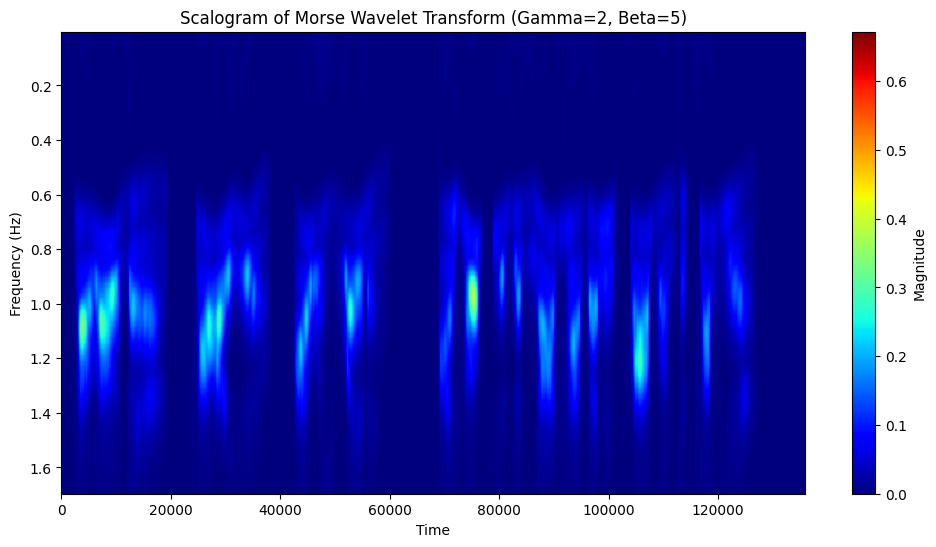

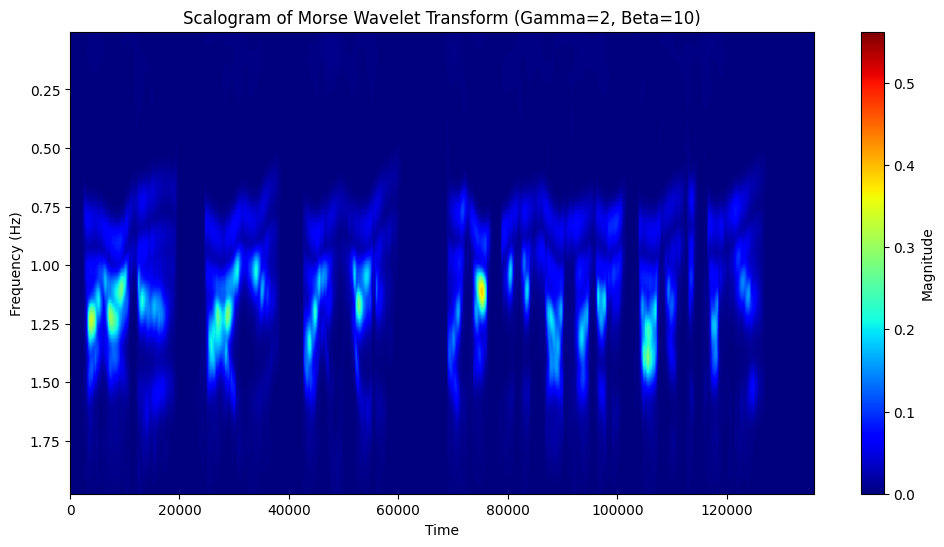

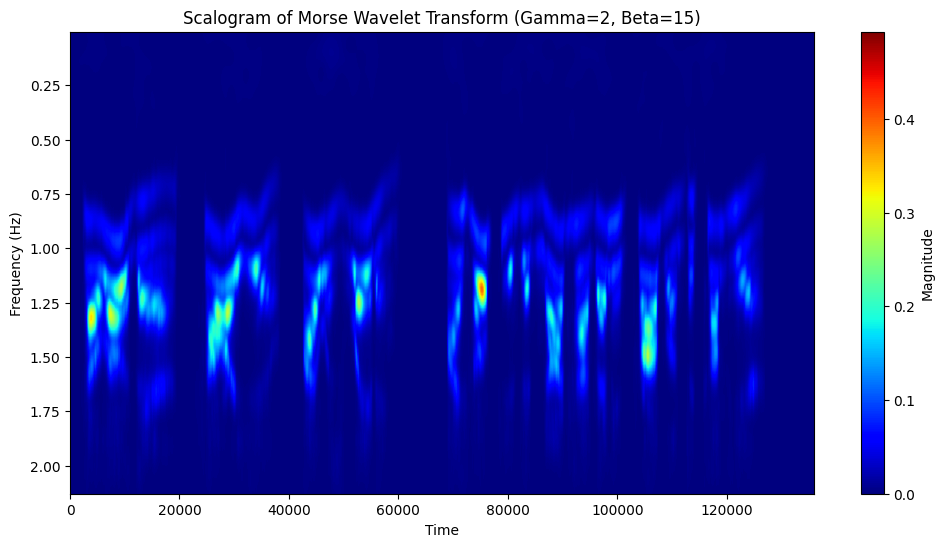

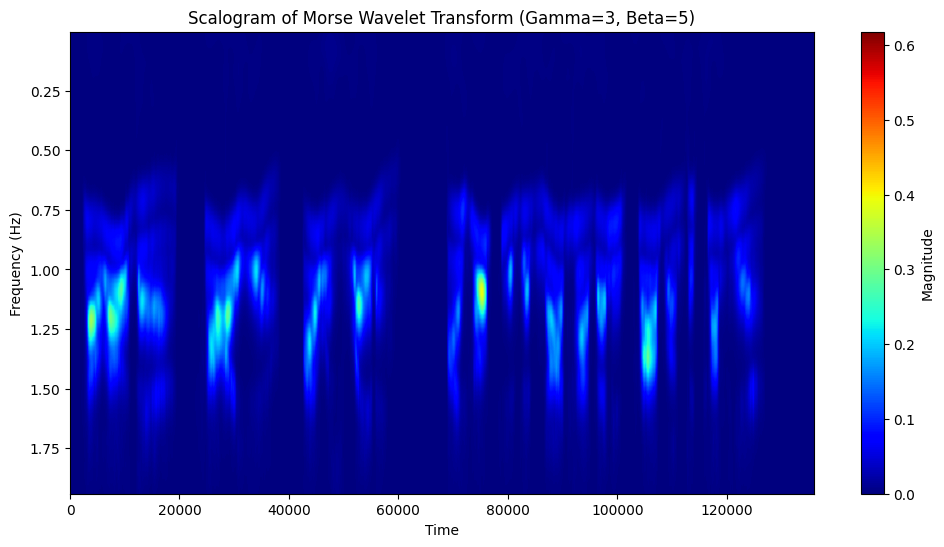

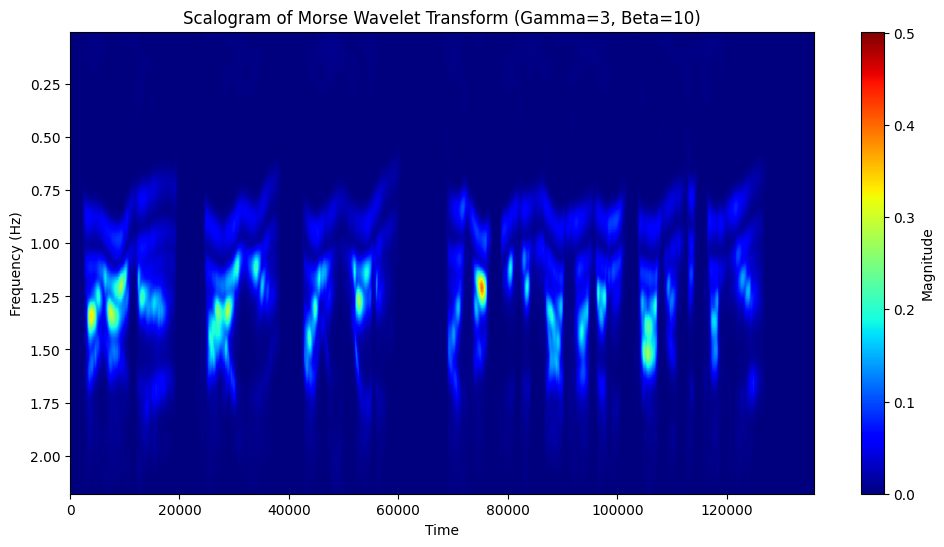

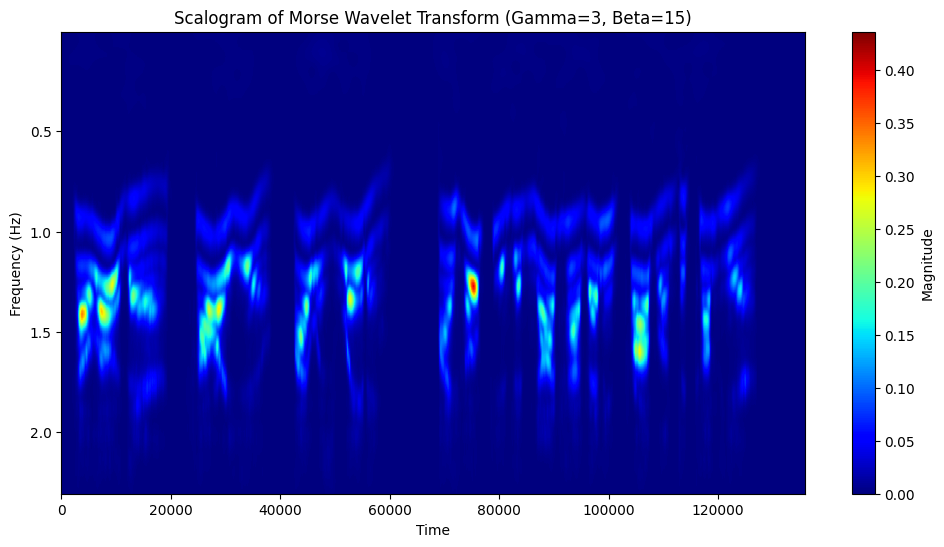

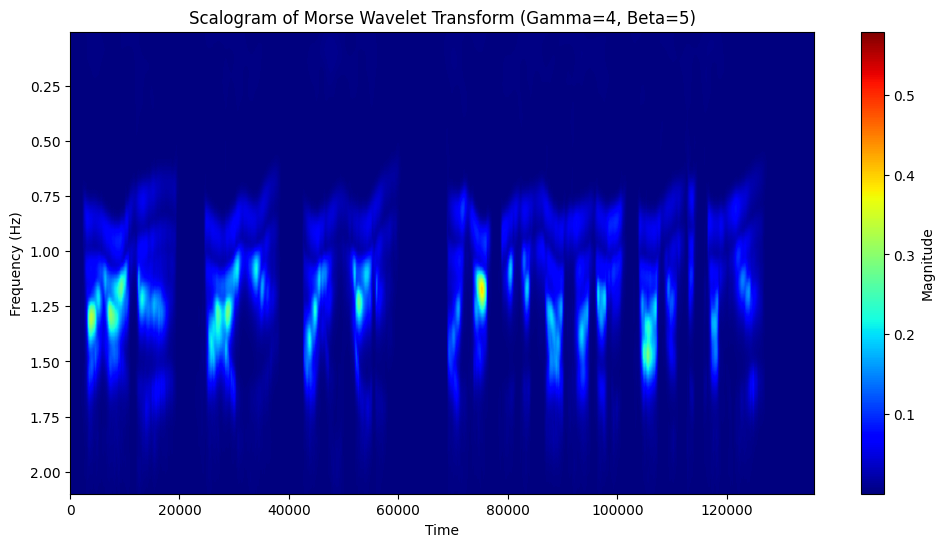

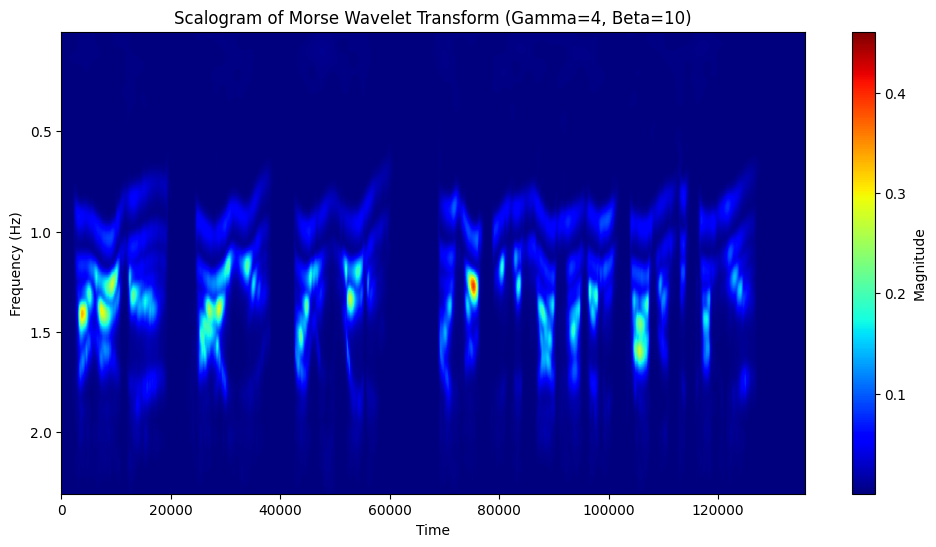

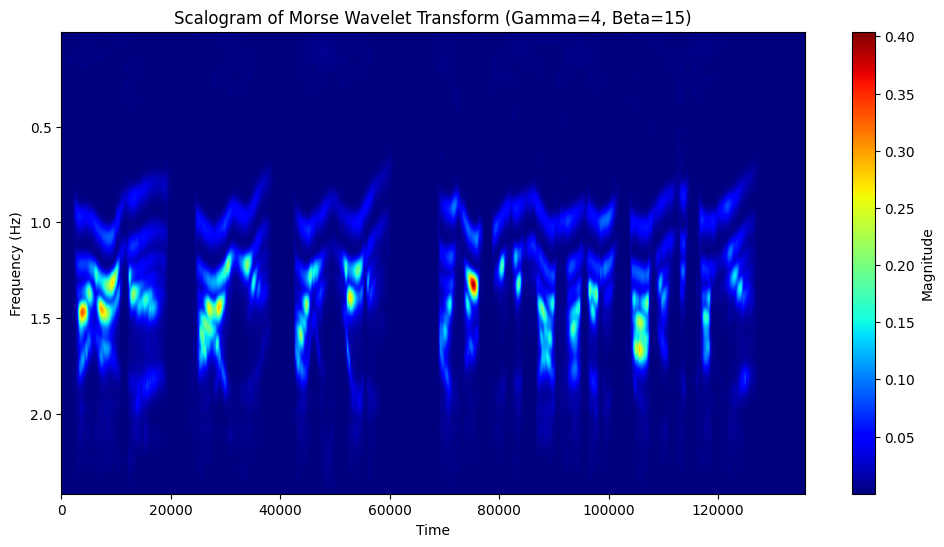

In [5]:
import numpy as np
from analytic_wavelet import analytic_wavelet_transform, GeneralizedMorseWavelet
import librosa
import matplotlib.pyplot as plt

# Load MP3 file and extract audio data
audio_file = '/content/5oRTvfIF.mp3'
audio_data, sr = librosa.load(audio_file, sr=None)

# Define different values of gamma and beta
gammas = [2, 3, 4]  # Different gamma values
betas = [5, 10, 15]  # Different time-bandwidth product values

# Loop over different gamma and beta values
for gamma in gammas:
    for beta in betas:
        # Morse wavelet transform parameters
        morse = GeneralizedMorseWavelet(gamma=gamma, beta=beta)
        fs = morse.log_spaced_frequencies(high=np.pi, low=np.pi / 1000, nyquist_overlap=0.05)

        # Compute wavelet coefficients
        psi, psi_f = morse.make_wavelet(len(audio_data), fs)
        wp = analytic_wavelet_transform(audio_data, psi_f, np.isrealobj(psi))

        # Plot the scalogram
        plt.figure(figsize=(12, 6))
        plt.imshow(np.abs(wp), extent=[0, len(audio_data), fs[-1], fs[0]], aspect='auto', cmap='jet')
        plt.colorbar(label='Magnitude')
        plt.title(f'Scalogram of Morse Wavelet Transform (Gamma={gamma}, Beta={beta})')
        plt.xlabel('Time')
        plt.ylabel('Frequency (Hz)')
        plt.gca().invert_yaxis()
        plt.show()


# Drawing Scalogram for Morlet wavelet

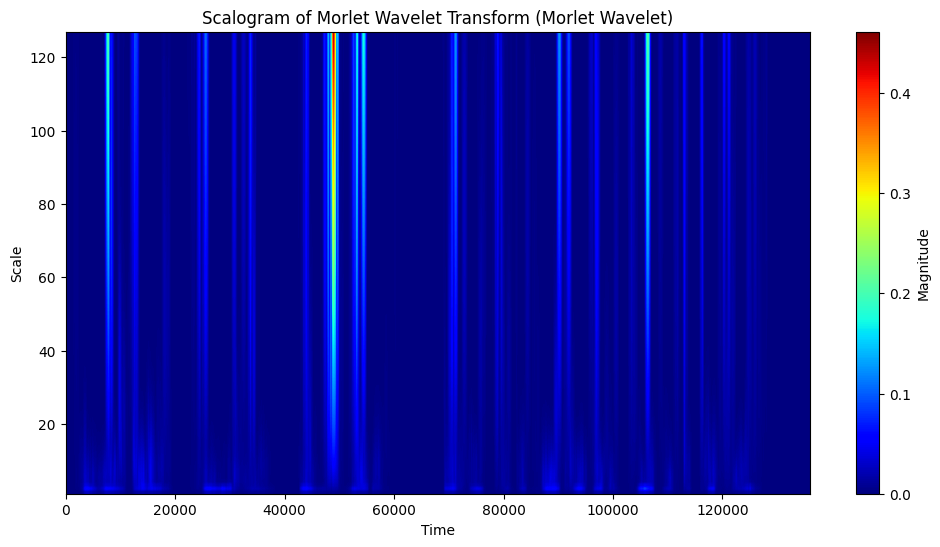

In [6]:
import numpy as np
from scipy.signal import cwt, morlet
import librosa
import matplotlib.pyplot as plt

# Load MP3 file and extract audio data
audio_file = '/content/5oRTvfIF.mp3'
audio_data, sr = librosa.load(audio_file, sr=None)

# Parameters for the continuous wavelet transform
widths = np.arange(1, 128)
wavelet = morlet

# Compute the scalogram using Morlet continuous wavelet transform
cwtmatr = cwt(audio_data, wavelet, widths)

# Plot the scalogram
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(cwtmatr), extent=[0, len(audio_data), widths[-1], widths[0]], aspect='auto', cmap='jet')
plt.colorbar(label='Magnitude')
plt.title('Scalogram of Morlet Wavelet Transform (Morlet Wavelet)')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.gca().invert_yaxis()
plt.show()


#Drawing scalogram for mexican hat wavelet

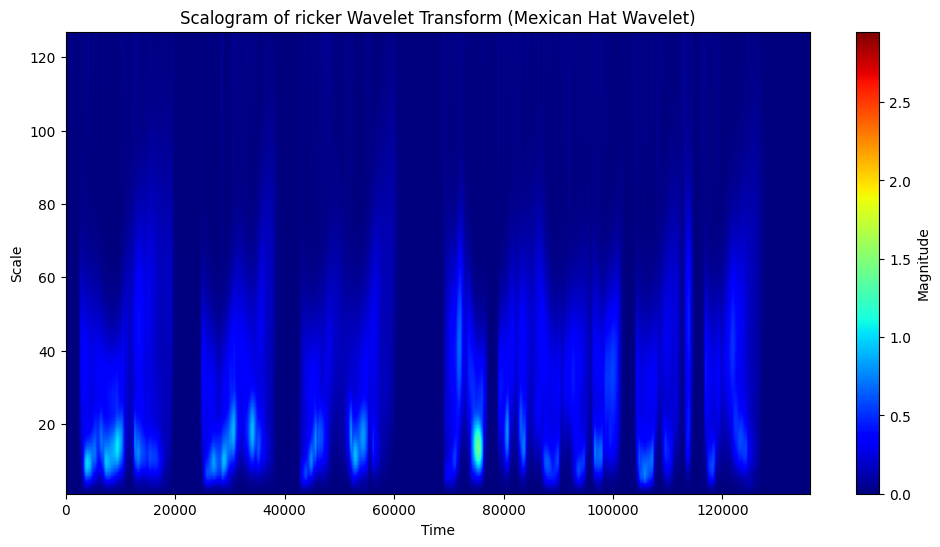

In [7]:
import numpy as np
from scipy.signal import cwt, ricker
import librosa
import matplotlib.pyplot as plt

# Load MP3 file and extract audio data
audio_file = '/content/5oRTvfIF.mp3'
audio_data, sr = librosa.load(audio_file, sr=None)

# Parameters for the continuous wavelet transform
widths = np.arange(1, 128)
wavelet = ricker

# Compute the scalogram using ricker continuous wavelet transform
cwtmatr = cwt(audio_data, wavelet, widths)

# Plot the scalogram
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(cwtmatr), extent=[0, len(audio_data), widths[-1], widths[0]], aspect='auto', cmap='jet')
plt.colorbar(label='Magnitude')
plt.title('Scalogram of ricker Wavelet Transform (Mexican Hat Wavelet)')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.gca().invert_yaxis()
plt.show()
